# Kurapati Venkatesh
# 09012021
# Topic: K-means Clustering

# ---------------------------------------------------------------------------

## 5.)	Perform clustering on mixed data convert the categorical  variables to numeric by using dummies or Label Encoding and perform normalization techniques. The data set consists details of customers related to auto insurance. Refer to Autoinsurance.csv dataset.

## -----------------------------------------------------------------------------------

### Business objective: To identify customer via clustering or get to know the customer via segmentation

## -------------------------------------------------------------------------------------------

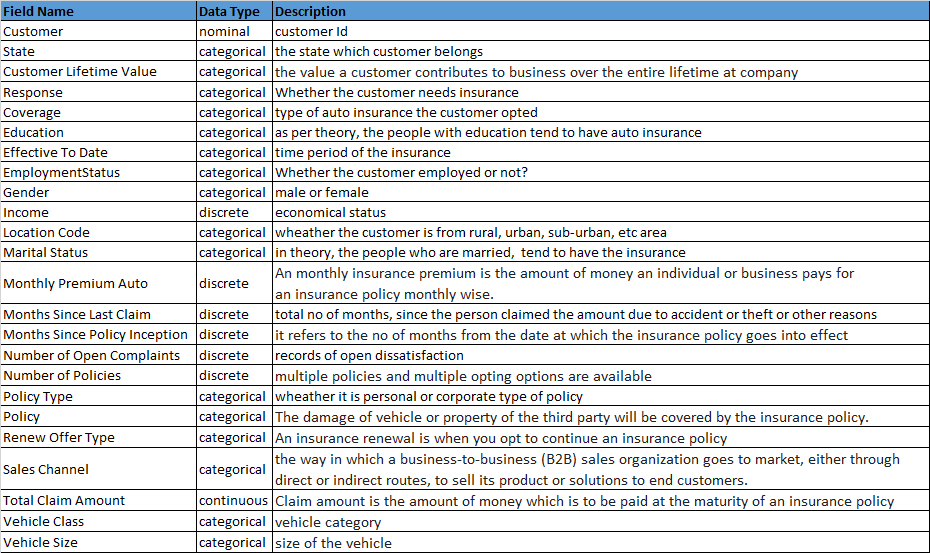

## ---------------------------------------------------------------------------------------------------------------------------

In [41]:
import seaborn as sns # for data visualization
import pandas as pd # for data analysis
import numpy as np # for numeric calculation
import matplotlib.pyplot as plt # for data visualization

In [42]:
au1 = pd.read_csv("G:/360digit/assignments meterial/K_means clustering/AutoInsurance (1).csv")

In [43]:
au1.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [44]:
au = au1.drop(["Customer"], axis=1)

### ----------------------------------------------EDA---------------------------------------------------

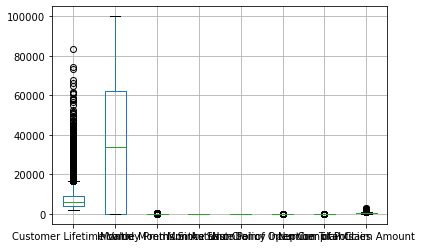

In [45]:
au.boxplot()

Looking at the box plot, it seems that the variables Customer Lifetime Value, Monthly Premium Auto,  Number of Open Complaints, Number of Policies have outlier present in the variables. These outliers value needs to be teated.

In [46]:
# create a user defined function remove_ol for getting the threshold value from IQR. 
def remove_ol(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

### Outliers Treatment:

#### Customer Lifetime Value:

In [47]:
low, up = remove_ol(au['Customer Lifetime Value'])
au['Customer Lifetime Value'] = np.where(au['Customer Lifetime Value'] > up, up, au['Customer Lifetime Value']) 
au['Customer Lifetime Value'] = np.where(au['Customer Lifetime Value'] < low, low, au['Customer Lifetime Value']) 

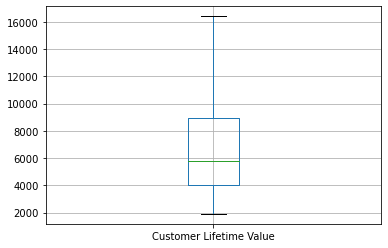

In [48]:
au.boxplot(['Customer Lifetime Value'])

####  Monthly Premium Auto:

In [49]:
low, up = remove_ol(au['Monthly Premium Auto'])
au['Monthly Premium Auto'] = np.where(au['Monthly Premium Auto'] > up, up, au['Monthly Premium Auto']) 
au['Monthly Premium Auto'] = np.where(au['Monthly Premium Auto'] < low, low, au['Monthly Premium Auto']) 

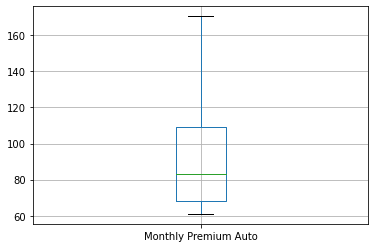

In [50]:
au.boxplot(['Monthly Premium Auto'])

#### Number of Open Complaints:

In [51]:
low, up = remove_ol(au['Number of Open Complaints'])
au['Number of Open Complaints'] = np.where(au['Number of Open Complaints'] > up, up, au['Number of Open Complaints']) 
au['Number of Open Complaints'] = np.where(au['Number of Open Complaints'] < low, low, au['Number of Open Complaints']) 

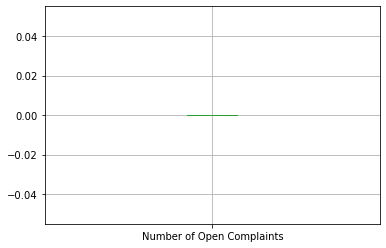

In [52]:
au.boxplot('Number of Open Complaints')

#### Number of Policies

In [53]:
low, up = remove_ol(au['Number of Policies'])
au['Number of Policies'] = np.where(au['Number of Policies'] > up, up, au['Number of Policies']) 
au['Number of Policies'] = np.where(au['Number of Policies'] < low, low, au['Number of Policies'])

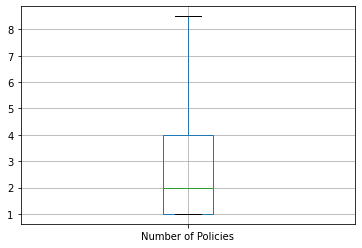

In [54]:
au.boxplot('Number of Policies')

##### Histogram Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000200553090D0>,
      dtype=object)

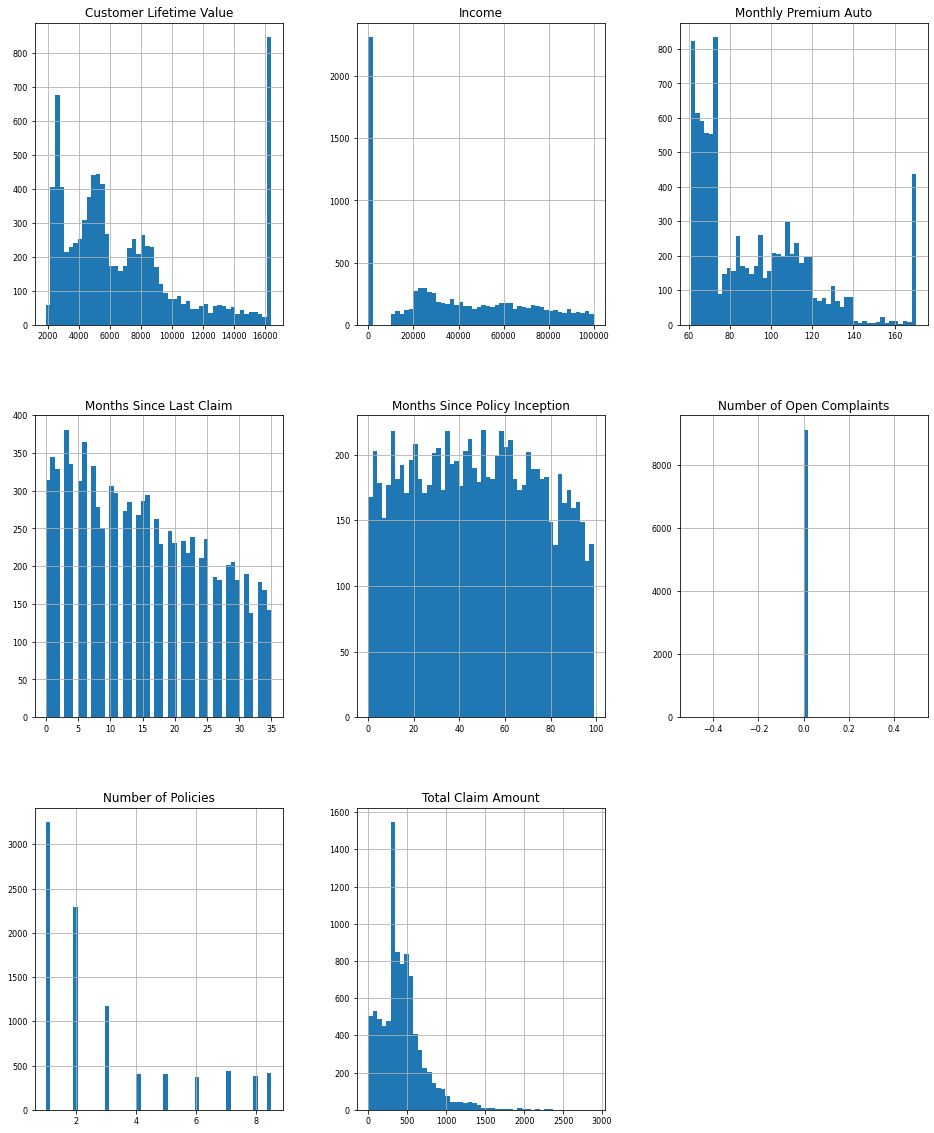

In [55]:
au.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

#Create dummy variables on categorcal columns

In [56]:
df= pd.get_dummies(au)

##### Corelation Analysis:

In [57]:
df.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
Customer Lifetime Value,1.000000,0.030241,0.437610,0.007527,-0.002747,NaN,0.111920,0.241014,-0.012316,0.006875,...,-0.018373,-0.229446,0.178163,0.182902,0.216187,0.103083,-0.107673,-0.027956,0.017145,0.001739
Income,0.030241,1.000000,-0.019880,-0.026715,-0.000875,NaN,-0.008601,-0.355254,-0.003971,-0.002351,...,0.005062,0.004707,0.005102,-0.009720,-0.019491,-0.017324,0.024617,-0.018883,0.015847,-0.003762
Monthly Premium Auto,0.437610,-0.019880,1.000000,-0.000731,0.018061,NaN,-0.013378,0.602366,-0.017138,0.010727,...,-0.006416,-0.501089,0.374789,0.398667,0.491263,0.247766,-0.261515,-0.014920,0.016637,-0.007736
Months Since Last Claim,0.007527,-0.026715,-0.000731,1.000000,-0.042959,NaN,0.009691,0.007563,0.000023,-0.001042,...,-0.009368,0.005973,0.005106,0.002565,-0.019258,0.000585,0.008648,-0.007268,0.015296,-0.012090
Months Since Policy Inception,-0.002747,-0.000875,0.018061,-0.042959,1.000000,NaN,-0.013037,0.003335,-0.004856,-0.010809,...,0.002433,-0.004336,0.018329,0.013408,-0.018470,0.018596,0.002551,0.000449,-0.006390,0.007047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vehicle Class_Sports Car,0.103083,-0.017324,0.247766,0.000585,0.018596,NaN,0.006050,0.101023,0.002209,0.010370,...,0.012198,-0.239359,-0.031885,-0.033917,-0.117025,1.000000,-0.120664,-0.001808,0.027389,-0.030299
Vehicle Class_Two-Door Car,-0.107673,0.024617,-0.261515,0.008648,0.002551,NaN,0.003158,-0.146712,-0.007387,-0.012186,...,-0.014276,-0.516175,-0.068760,-0.073141,-0.252363,-0.120664,1.000000,0.022785,-0.026310,0.012859
Vehicle Size_Large,-0.027956,-0.018883,-0.014920,-0.007268,0.000449,NaN,-0.021236,-0.009391,0.000574,-0.000183,...,-0.008396,-0.002582,-0.002393,-0.002702,-0.017186,-0.001808,0.022785,1.000000,-0.523329,-0.166292
Vehicle Size_Medsize,0.017145,0.015847,0.016637,0.015296,-0.006390,NaN,0.005864,-0.074274,0.008166,0.009371,...,0.015734,-0.006222,-0.015639,-0.007520,0.027053,0.027389,-0.026310,-0.523329,1.000000,-0.753241


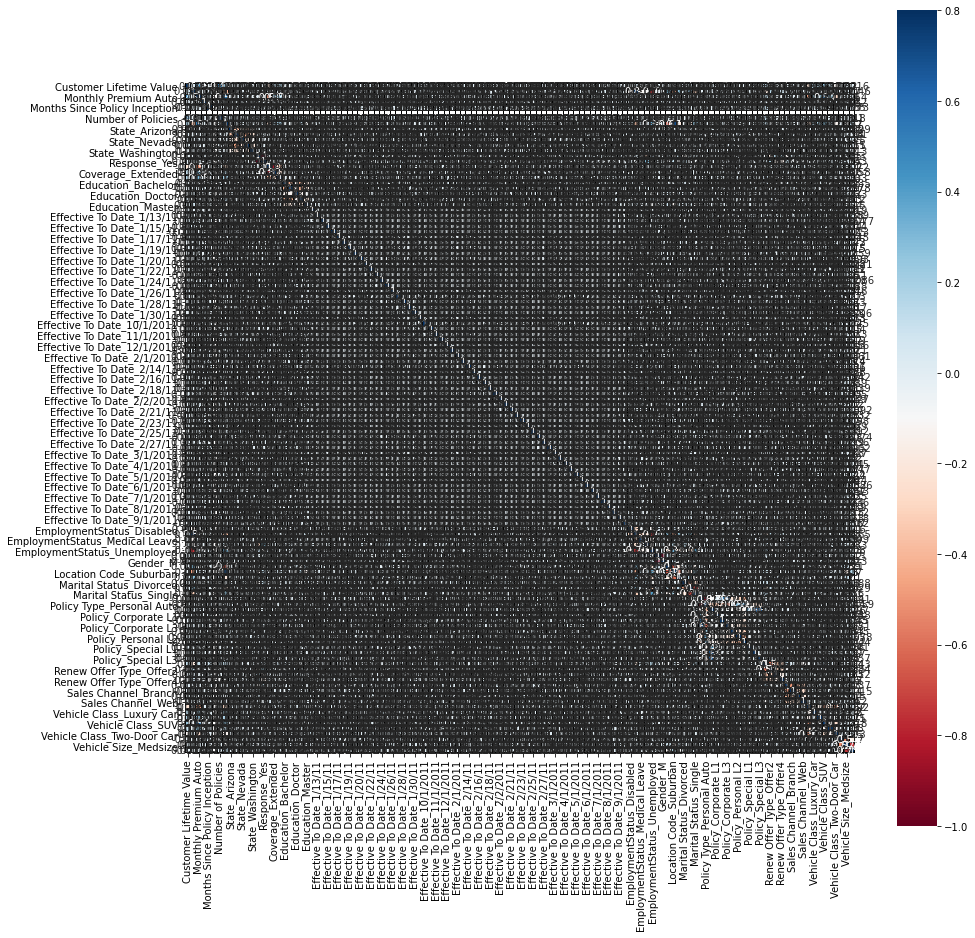

In [58]:
corr = df.corr(method='spearman')
plt.figure(figsize=(15,15))
sns.heatmap(corr, vmax = 0.8, linewidths = 0.01, square = True, annot = True, cmap='RdBu', linecolor='black')

Majorly there is no correlation is observed

#### Scree plot or Elbow curve ######################################################

In [63]:
TWSS = []
k = list(range(2, 10))

In [64]:
from sklearn.cluster import KMeans
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    TWSS.append(kmeans.inertia_)
    
TWSS

[2310866641365.8604,
 1089471977960.8569,
 599241886471.4691,
 423112086815.2783,
 331848316857.9003,
 287940116537.06805,
 255407756036.3432,
 224527314382.71423]

Text(0, 0.5, 'total_within_SS')

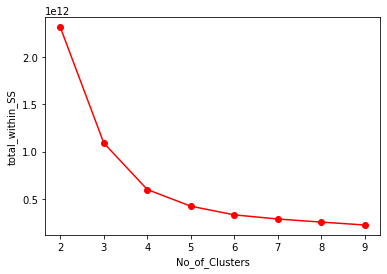

In [65]:
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

#### Selecting 4 clusters as optimum number of clusters from scree plot.

In [67]:
model = KMeans(n_clusters = 4)
model.fit(df)

KMeans(n_clusters=4)

In [68]:
model.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 
au['clust'] = mb # creating a  new column and assigning it to new column 

In [69]:
au.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,clust
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,0.0,1.0,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,1
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,0.0,8.0,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,0.0,2.0,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,1
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,0.0,7.0,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0
4,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,Rural,...,0.0,1.0,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,1


In [72]:
au = au.iloc[:,[23,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]]
au.head()

,clust,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,1,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0.0,1.0,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,0,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0.0,8.0,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,1,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0.0,2.0,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,0,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0.0,7.0,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,1,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0.0,1.0,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [75]:
au1.iloc[:, 2:24].groupby(au.clust).mean()
au.to_csv("Kmeans_Auto insurance.csv", encoding = "utf-8")

import os
os.getcwd()

'C:\\Users\\Hp\\Documents\\jjjpter'

### Business Recommendations: 

#### • The customer segmentation results of these algorithms can complement and reinforce each other and demonstrate as much information as possible to support decision-making. 
#### • The clustering for an auto insurance company that may support the company to make customer related decisions and develop insurance products.

